# Initial Research

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### CIC IDS 2017

This looks really promising!

In [3]:
fri_ddos = pd.read_csv(r"C:\Users\corri\OneDrive\Documents\Uni\Postgraduate\Final Project\CIC\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

fri_ps = pd.read_csv(r"C:\Users\corri\OneDrive\Documents\Uni\Postgraduate\Final Project\CIC\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")

fri_mor = pd.read_csv(r"C:\Users\corri\OneDrive\Documents\Uni\Postgraduate\Final Project\CIC\Friday-WorkingHours-Morning.pcap_ISCX.csv")

thu_inf = pd.read_csv(r"C:\Users\corri\OneDrive\Documents\Uni\Postgraduate\Final Project\CIC\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")

thu_wa = pd.read_csv(r"C:\Users\corri\OneDrive\Documents\Uni\Postgraduate\Final Project\CIC\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")

wed = pd.read_csv(r"C:\Users\corri\OneDrive\Documents\Uni\Postgraduate\Final Project\CIC\Wednesday-workingHours.pcap_ISCX.csv")

tue = pd.read_csv(r"C:\Users\corri\OneDrive\Documents\Uni\Postgraduate\Final Project\CIC\Tuesday-WorkingHours.pcap_ISCX.csv")

mon = pd.read_csv(r"C:\Users\corri\OneDrive\Documents\Uni\Postgraduate\Final Project\CIC\Monday-WorkingHours.pcap_ISCX.csv")

In [4]:
fri_ddos

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
fri_ddos.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [6]:
fri_ddos.groupby(fri_ddos.columns[78]).size()

 Label
BENIGN     97718
DDoS      128027
dtype: int64

The first thing to note is that the column headers all have a whitespace at the start of them. We'll remove this and update the columns.

In [7]:
column_headers = []
for i in range(79):
    column_headers.append(fri_ddos.columns[i].lstrip())

In [8]:
fri_ddos.columns = column_headers
fri_ps.columns = column_headers
fri_mor.columns = column_headers
thu_inf.columns = column_headers
thu_wa.columns = column_headers
wed.columns = column_headers
tue.columns = column_headers
mon.columns = column_headers

We'll combine the seperate data frames into one, thus we can get a overview of the structure of the data.

In [9]:
frames = [mon, tue, wed, thu_wa, thu_inf, fri_mor, fri_ps, fri_ddos]
week_df = pd.concat(frames)

In [10]:
week_df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


#### Basic EDA

Let's look at some baseline statistics.

In [11]:
pd.options.display.max_columns = None
# pd.options.display.max_columns = 20
week_df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.829385e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2.830743e+06,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,8.708495e+02,4.104958e+01,3.059493e+02,3.353257e+02,inf,inf,1.298449e+06,2.919271e+06,9.182475e+06,1.623796e+05,1.448296e+07,2.610193e+06,3.266957e+06,9.042939e+06,1.021893e+06,9.893830e+06,1.805784e+06,1.485973e+06,4.684692e+06,9.672614e+05,4.644646e-02,0.0,1.112782e-04,0.0,-2.599739e+04,-2.273275e+03,6.386535e+04,6.995192e+03,1.643450e+01,9.504024e+02,1.719444e+02,2.949756e+02,4.861548e+05,3.537976e-02,4.644646e-02,2.423392e-04,2.980705e-01,3.158443e-01,9.482316e-02,1.112782e-04,2.433990e-04,6.835004e-01,1.919837e+02,5.820194e+01,3.059493e+02,-2.599739e+04,0.0,0.0,0.0,0.0,0.0,0.0,9.361160e+00,5.492919e+02,1.039377e+01,1.616230e+04,6.989837e+03,1.989433e+03,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,1.946367e+03,6.886260e+01,6.052568e+02,8.396932e+02,NaN,NaN,4.507944e+06,8.045870e+06,2.445954e+07,2.950282e+06,3.357581e+07,9.525722e+06,9.639055e+06,2.452916e+07,8.591436e+06,2.873661e+07,8.887197e+06,6.278469e+06,1.716095e+07,8.308983e+06,2.104500e-01,0.0,1.054826e-02,0.0,2.105286e+07,1.452209e+06,2.475371e+05,3.815170e+04,2.523772e+01,2.028229e+03,3.054915e+02,6.318001e+02,1.647490e+06,1.847378e-01,2.104500e-01,1.556536e-02,4.574107e-01,4.648513e-01,2.929706e-01,1.054826e-02,1.559935e-02,6.804920e-01,3.318603e+02,1.860912e+02,6.052568e+02,2.105286e+07,0.0,0.0,0.0,0.0,0.0,0.0,7.496728e+02,9.980070e+03,9.973883e+02,2.26305

Flow Bytes and Flow packets immediately jump out as something we should be concerned about in this data set. Standardisation will be important but we will also need to deal with both the NaN values and infinite values here. We have some places where 0 seems to be the only entry e.g. Bwd PSH Flags so this should be checked too. Since we have such a variety of data, standardisation is something that we should take good care in this data set to ensure we dont skew the data at all.

In [12]:
week_df.groupby('Flow Bytes/s').size().sort_values(ascending = False)

Flow Bytes/s
0.000000e+00    355767
4.000000e+06     24991
1.333333e+06     10096
3.000000e+06      9682
8.333333e+04      8884
                 ...  
1.594712e+02         1
1.594694e+02         1
1.594686e+02         1
1.594683e+02         1
1.731852e+03         1
Length: 1593908, dtype: int64

The majority of values in Flow Bytes are 0 but we will still need to handle the infinities and NaN.

And check for **missingness** (briefly).

In [13]:
week_df.isnull().values.any()

True

So we will have some missingness to handle in our data sets.

In [14]:
for col in column_headers:
    if week_df[col].isnull().values.any():
        print(col + ' contains null values')

Flow Bytes/s contains null values


So either our describe function is getting the flow packets column wrong or our isnull function isn't picking up the missingness in this column. We will thus need to take extra care when considering this missingness.

We'll have a look into the traffic classification to see how much attack vs normal data we have.

In [15]:
a = week_df.groupby('Label').size().sort_values(ascending = False)
print(a)

Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
dtype: int64


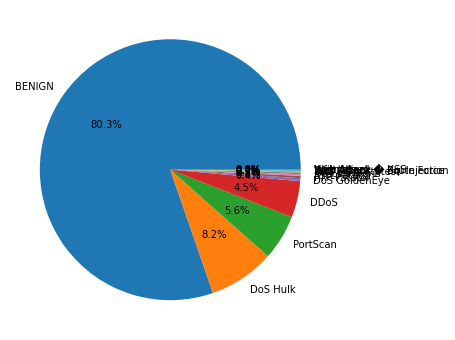

In [16]:
plt.figure(figsize=(6,6))
plt.pie(a, labels=a.index,autopct='%1.1f%%')
plt.show()

So as usual, the majority of our data is normal traffic, with a small amount of attack traffic. We'll split out the attack data and look at their distribution.

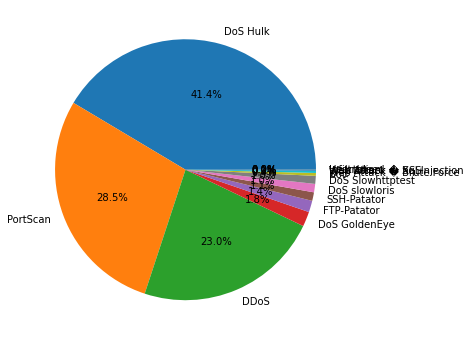

In [17]:
attack_counts = a.drop('BENIGN')
plt.figure(figsize=(6,6))
plt.pie(attack_counts, labels=attack_counts.index,autopct='%1.1f%%')
plt.show()

The majority of the attack traffic comes from 3 attacks DoS Hulk, PortScan and DDoS. We have some other attack traffic which we will finally seperate out.

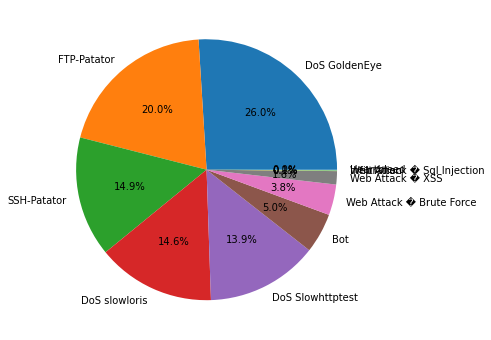

In [18]:
small_attack_counts = attack_counts.drop(['DoS Hulk','PortScan','DDoS'])
plt.figure(figsize=(6,6))
plt.pie(small_attack_counts, labels=small_attack_counts.index,autopct='%1.1f%%')
plt.show()

So the remaining small attacks are DoS and Palator mainly. Palator isn't something I've heard of so it would be interesting to investigate this. Other than that we have a minute amount of Web attack traffic which wil be interesting to see if our models can identify.

In [19]:
from sklearn.clusters import DBSCAN

ImportError: cannot import name 'DBSCAN' from 'sklearn' (C:\Users\corri\anaconda3\lib\site-packages\sklearn\__init__.py)

#### Overall

After some brief EDA, this seems to be the best data set I've looked into, for a few reasons:
- ease of use: the traffic has been turned into a csv already for us to import easily. This reduces the reliance on a feature extraction method we may have to perform for some other data sets.
- labelling: the traffic is labelled (attacks are split out so it is non-binary) which supports supervised learning which is a main component of machine learning. This allows us to easily create and evaluate models, and since it is non-binary, allows us to identify the specific attacks. Furthermore, one of the interesting parts of this project is the research into these attacks. Since they are named, we can use resources such as Att&ck to understand the techniques of each attack and try to aid our models using this,
- attacks: as claimed in the paper, the attacks used are up to date and are being used in cybersecurity breaches currently and therefore we will get a good overview of the techniques we can use to identify current attacks.
- size: the entire data set has almost 3 million data points which makes it large enough (I think) for Neural networks and over machine learning techniques. This also means it will have a variety of traffic that can be analysed, most of which will be unimportant but having such a large amount allows us to identify the outliers.
- timing: the data is split into 5 days and is given in chronological order. This could allow us to create a visulaisation with dating/timing along the x axis and spikes on the y axis where predicted attacks are. Here we could create a nice visulaisation showing false positives/true positives.
- feature labels: the features are labelled in this data set unlike some other data sets we've looked into. This will allow us to use T&T to give the models more information based on our understanding of the attacks.

## Kitsune DataSet

Below is a brief introduction to the Kitsune data set. Here we'll perform some initial EDA on the data set and understand where we can go from there. The data set is split into 9 different data sets, each encompassing a different attack type:
1. OS scan using Nmap
2. Fuzzing
3. Video Injection
4. ARP Man in the Middle
5. Active Wiretap
6. SSDP Flood
7. SYN DoS
8. SSSL Reneg
9. Mirai Malware

In this initial research I'll look into the Active Wiretap and Mirai Malware data sets to understand how they function and what they can be used for. We would then want to use the other data sets in the final project but since they all use the same feature extraction system which is commented on below, we'll use these to initially.

### Active Wiretap

In [2]:
aw_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00516/active_wiretap/Active%20Wiretap_dataset.csv.gz",header=None)

In [3]:
aw_labels = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00516/active_wiretap/Active%20Wiretap_labels.csv.gz")

In [4]:
aw_df.columns = np.arange(1,aw_df.shape[1]+1)

In [5]:
aw_dict = {1:'aw',0:'Normal'}

In [6]:
labeled_aw_df = aw_df
labeled_aw_df["Label"] = np.array(aw_labels['x'])
labeled_aw_df['Label'] = labeled_aw_df['Label'].map(aw_dict)

One of the first issues we identify with this data set is that it has no feature headers. As is referenced in the paper, the features are produced through a feature extraction framework called AfterImage which produces meta data for the packets but doesn't provide any indication of what each feature is. I think we could use the AfterImage, netStat and FeatureExtraction code to determine what these headers are but they're fairly complex. FeatureExtraction calls netStat which calls getheaders functions from AfterImage. This produces the features (I think) but it seems fairly complex in what it actually produces.

In [7]:
labeled_aw_df

,1,2,3,4,5,6,7,8,9,10,...,107,108,109,110,111,112,113,114,115,Label
0,1.000000,209.000000,0.000000,1.000000,209.000000,0.000000,1.000000,209.000000,0.000000,1.000000,...,0.0,0.0,1.000000,209.000000,0.000000,209.000000,0.000000,0.0,0.0,Normal
1,1.997325,862.373975,425755.486168,1.998394,862.024385,425755.975020,1.999464,861.674795,425756.219447,1.999946,...,0.0,0.0,1.999995,861.501748,652.500000,861.501748,425756.249997,0.0,0.0,Normal
2,2.996411,1079.842842,378082.653480,2.997845,1079.505801,378229.720545,2.999281,1079.168633,378376.616388,2.999928,...,0.0,0.0,2.999993,1079.001686,615.182303,1079.001686,378449.266376,0.0,0.0,Normal
3,3.994158,1188.540874,318800.516638,3.996493,1188.224671,319007.239438,3.998830,1187.908272,319213.889702,3.999883,...,0.0,0.0,3.999988,1187.751583,565.080662,1187.751583,319316.154612,0.0,0.0,Normal
4,4.992429,1253.731406,271910.774230,4.995455,1253.439018,272140.056044,4.998484,1253.146398,272369.349253,4.999848,...,0.0,0.0,4.999985,1253.001464,521.998902,1253.001464,272482.853479,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278684,332.609473,1340.177692,183232.882631,529.813022,1341.631327,181398.521536,1472.758384,1340.599998,182217.882899,14106.165422,...,0.0,0.0,16954.764412,1341.785229,425.384638,1341.785229,180952.090098,0.0,0.0,aw
2278685,333.431978,1340.699005,182773.690611,530.643364,1341.956156,181112.560074,1473.601164,1340.717669,182114.618372,14107.014829,...,0.0,0.0,16955.746311,1341.795385,425.374150,1341.795385,180943.167110,0.0,0.0,aw
2278686,334.346580,1337.526551,185581.985136,531.561816,1339.958352,182889.431004,1474.525673,1339.998307,182753.633570,14107.942558,...,0.0,0.0,16956.737625,1341.732767,425.439749,1341.732767,180998.979720,0.0,0.0,aw
2278687,332.219835,1338.057746,185116.832751,529.573574,1340.286997,182601.168633,1472.757402,1340.116454,182650.087934,14106.291696,...,0.0,0.0,26411.030394,1341.496875,425.529675,1341.496875,181075.504671,0.0,0.0,aw


In [8]:
labeled_aw_df.groupby("Label").size()

Label
Normal    1355473
aw         923216
dtype: int64

In [9]:
aw_labels = labeled_aw_df["Label"]
labeled_aw_df = labeled_aw_df.drop(["Label"],axis=1)

We'll look at a big overview of the data first and then delve into the details.

In [10]:
labeled_aw_df.describe()

,1,2,3,4,5,6,7,8,9,10,...,106,107,108,109,110,111,112,113,114,115
count,2.278689e+06,2.278689e+06,2.278689e+06,2.278689e+06,2.278689e+06,2.278689e+06,2.278689e+06,2.278689e+06,2.278689e+06,2.278689e+06,...,2.278689e+06,2.278689e+06,2.278689e+06,2.278689e+06,2.278689e+06,2.278689e+06,2.278689e+06,2.278689e+06,2.278689e+06,2.278689e+06
mean,2.652877e+02,1.255537e+03,1.612102e+05,4.368372e+02,1.256197e+03,1.605000e+05,1.298611e+03,1.256851e+03,1.597297e+05,1.266995e+04,...,1.599037e+05,-5.413125e+00,-6.317832e-04,2.040830e+04,1.256995e+03,3.809854e+02,1.317057e+03,1.598822e+05,-7.518371e+00,-1.660497e-03
std,1.116645e+02,2.828745e+02,4.546676e+04,1.781979e+02,2.827945e+02,4.400194e+04,5.215372e+02,2.827827e+02,4.281431e+04,5.236506e+03,...,4.807994e+04,2.603864e+02,1.651825e-02,8.001634e+03,2.872365e+02,1.088076e+02,7.646965e+01,4.784424e+04,2.645842e+02,1.951970e-02
min,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,...,0.000000e+00,-3.286699e+04,-8.553003e-01,1.000000e+00,6.000000e+01,0.000000e+00,6.000000e+01,0.000000e+00,-3.313150e+04,-8.566865e-01
25%,1.771146e+02,1.296878e+03,1.458864e+05,2.956080e+02,1.297720e+03,1.442613e+05,8.790716e+02,1.296779e+03,1.424144e+05,8.724622e+03,...,1.796834e+05,0.000000e+00,0.000000e+00,1.451133e+04,1.334772e+03,4.253403e+02,1.334939e+03,1.809145e+05,0.000000e+00,0.000000e+00
50%,2.524109e+02,1.323878e+03,1.709064e+05,4.136435e+02,1.328468e+03,1.742176e+05,1.163974e+03,1.334525e+03,1.785883e+05,1.127817e+04,...,1.813216e+05,0.000000e+00,0.000000e+00,2.401334e+04,1.340341e+03,4.259172e+02,1.340510e+03,1.814055e+05,0.000000e+00,0.000000e+00
75%,3.557147e+02,1.340670e+03,1.884503e+05,6.004106e+02,1.340804e+03,1.866128e+05,1.750354e+03,1.340259e+03,1.847144e+05,1.692110e+04,...,1.825523e+05,0.000000e+00,0.000000e+00,2.678070e+04,1.340870e+03,4.265397e+02,1.340996e+03,1.819362e+05,0.000000e+00,0.000000e+00
max,5.364808e+02,1.514000e+03,5.285276e+05,8.035607e+02,1.514000e+03,5.285285e+05,2.117662e+03,1.513977e+03,5.221716e+05,1.983251e+04,...,4.888391e+05,2.380501e+04,1.071544e+00,3.053129e+04,1.418888e+03,6.991706e+02,1.420156e+03,4.888395e+05,2.373676e+04,1.079229e+00


One thing we can identify from here is that there are a lot of large max values. Standardisation would thus be an important task for this project.

We'll have a quick look for missingness in the data.

In [11]:
labeled_aw_df.isnull().values.any()

False

So missingness doesn't seem to occur in this data set. We can't completely rule it out (as is shown in project 4) but we cam hope this would identify any missingness.

One thing that I wanted to see is whether the attacks/normal data are grouped i.e. the first 1355473 entries are normal and then they turn to attacks. We do this below.

Text(0, 0.5, 'number of attack entries')

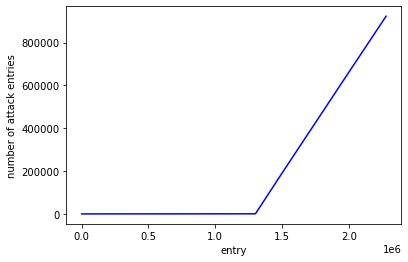

In [12]:
cnt = np.zeros(len(aw_labels))
for i in range(0,len(aw_labels)):
    if aw_labels[i] == 'aw':
        cnt[i] = cnt[i-1] + 1
    else:
        cnt[i] = cnt[i-1]

x = np.arange(0,len(aw_labels))
plt.plot(x,cnt,color='blue')
plt.xlabel('entry')
plt.ylabel('number of attack entries')

From the above, this looks to be the case, we have a straight flat line at the start i.e. all the normal and then a linear line after indicating all the attacks. This may mean that shuffling the data could be important in this case to avoid those patterns being used by the classifier.

#### Random Forest

As a proof of concept, it's interesting for us to look at a model we may apply and see how well it functions. I'll look at a random forest since this is 'easy' for me to implement with my previous uses of it.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(labeled_aw_df, aw_labels, test_size = 0.1, random_state = 10)

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
clf = RandomForestClassifier(n_estimators=100)

In [17]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [18]:
y_pred_rf=clf.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
b = confusion_matrix(Y_test, y_pred_rf)

In [21]:
import seaborn as sn

<AxesSubplot:>

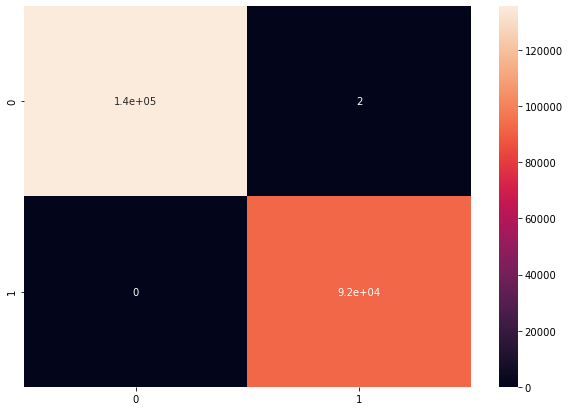

In [22]:
plt.figure(figsize = (10,7))
sn.heatmap(b, annot=True)

We visualise one of the trees below.

In [23]:
!pip install dtreeviz
!pip install graphviz

In [24]:
from sklearn import tree
from dtreeviz.trees import dtreeviz
plt.rcParams.update({'figure.figsize': (15.0, 15.0)})

In [25]:
estimator = clf.estimators_[5]

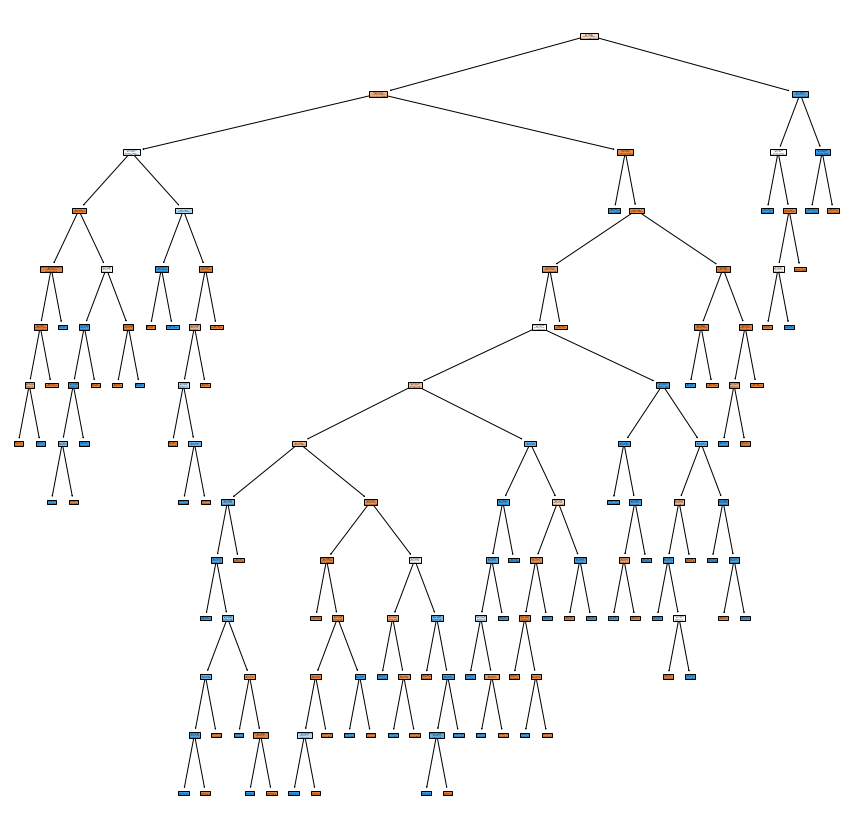

In [26]:
_ = tree.plot_tree(estimator, feature_names=labeled_aw_df.columns, filled=True)

### Mirai Malware

In [27]:
mm_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_dataset.csv.gz", header = None)

In [36]:
mm_labels = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_labels.csv.gz",header = None)

In [37]:
mm_df.columns = np.arange(1,mm_df.shape[1]+1)

In [38]:
mm_df

,1,2,3,4,5,6,7,8,9,10,...,107,108,109,110,111,112,113,114,115,116
0,0,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0
1,1,1.999983,60.000000,0.000000e+00,1.999990,60.000000,9.094947e-13,1.999997,60.000000,4.547474e-13,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0
2,2,1.000000,86.000000,0.000000e+00,1.000000,86.000000,0.000000e+00,1.000000,86.000000,0.000000e+00,...,0.000000e+00,0.0,0.0,1.000000,86.0,0.000000,86.000000,0.000000e+00,0.0,0.0
3,3,1.999272,86.000000,9.094947e-13,1.999563,86.000000,0.000000e+00,1.999854,86.000000,9.094947e-13,...,0.000000e+00,0.0,0.0,1.000000,86.0,0.000000,86.000000,0.000000e+00,0.0,0.0
4,4,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764132,764132,18.897961,60.185845,3.594147e+00,51.700968,60.182642,3.492246e+00,257.391336,60.137137,2.455690e+00,...,5.456968e-12,0.0,0.0,30682.136500,60.0,0.000004,60.000000,1.546141e-11,0.0,0.0
764133,764133,19.775173,60.176447,3.414055e+00,52.499151,60.179163,3.426350e+00,258.055986,60.136606,2.446246e+00,...,4.547474e-12,0.0,0.0,30682.736491,60.0,0.000004,60.000000,1.500666e-11,0.0,0.0
764134,764134,20.692078,60.167920,3.250494e+00,53.366680,60.175805,3.362736e+00,258.838753,60.136078,2.436867e+00,...,5.002221e-12,0.0,0.0,30683.478094,60.0,0.000004,60.000000,1.546141e-11,0.0,0.0
764135,764135,21.566383,60.160134,3.101020e+00,54.171935,60.172560,3.301221e+00,259.523519,60.135554,2.427549e+00,...,5.002221e-12,0.0,0.0,30684.104181,60.0,0.000004,60.000000,1.591616e-11,0.0,0.0


In [43]:
mm_labels

0         0
1         0
2         0
3         0
4         0
         ..
764132    1
764133    1
764134    1
764135    1
764136    1
Name: 0, Length: 764137, dtype: int64

In [42]:
mm_labels = mm_labels[0]

#### Random Forest

In [46]:
mm_train, mm_test, mmY_train, mmY_test = train_test_split(mm_df, mm_labels, test_size = 0.1, random_state = 10)

In [45]:
mmlf = RandomForestClassifier(n_estimators=100)

In [49]:
mmlf.fit(mm_train, mmY_train)

RandomForestClassifier()

In [50]:
mm_pred_rf = mmlf.predict(mm_test)

In [51]:
c = confusion_matrix(mmY_test, mm_pred_rf)

<AxesSubplot:>

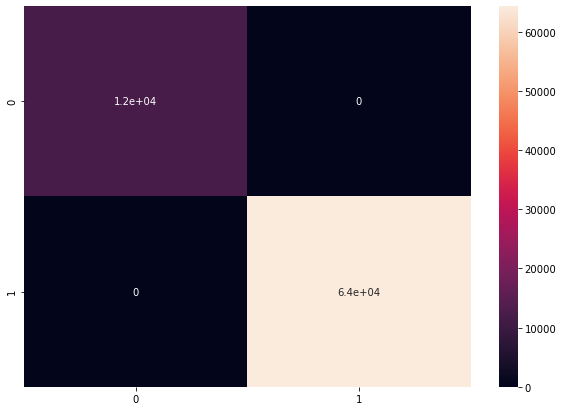

In [52]:
plt.figure(figsize = (10,7))
sn.heatmap(c, annot=True)

### References

1. [Kitsune Datasets](https://archive.ics.uci.edu/ml/datasets/Kitsune+Network+Attack+Dataset)
2. [Kitsune Paper](https://arxiv.org/pdf/1802.09089.pdf)
3. [Dataset description](https://www.kaggle.com/ymirsky/network-attack-dataset-kitsune) 
4. [Decision Tree Visualisation](https://mljar.com/blog/visualize-tree-from-random-forest/)
5. [CIC Dataset](https://www.unb.ca/cic/datasets/ids-2017.html)